Boston-Housing Dataset
Columns:
- **CRIM: ** Per capita crime rate by town
- **ZN: ** Proportion of residential land zoned for lots over 25,000 sq. ft
- **INDUS: ** Proportion of non-retail business acres per town
- **CHAS : ** Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX: ** Nitric oxide concentration (parts per 10 million)
- **RM: ** Average number of rooms per dwelling
- **AGE: ** Proportion of owner-occupied units built prior to 1940
- **DIS: ** Weighted distances to five Boston employment centers
- **RAD: ** Index of accessibility to radial highways
- **PTRATIO: ** Pupil-teacher ratio by town
- **B: ** 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- **LSTAT: ** Percentage of lower status of the population
- **MEDV: ** Median value of owner-occupied homes in $1000s

 ## <span id="2"></span> ** Meng-import Library dan Membaca dataset **

In [1]:
import zipfile,shutil, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')



In [2]:
#Unzip Data

dir = 'C:/Users/Marclim/Code/python/Project-UNI/'

file = dir + 'boston-housing.zip'
unzip_loc = dir
with zipfile.ZipFile(file, 'r') as zip_ref:
     zip_ref.extractall(unzip_loc)
     zip_ref.close()
os.listdir(dir)

['.git',
 '.ipynb_checkpoints',
 'boston-housing.zip',
 'PML-1.ipynb',
 'PML-2.ipynb',
 'submission_example.csv',
 'test.csv',
 'train.csv']

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.drop(columns=['ID'], inplace = True)

In [5]:
df_train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [25]:
df_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


 ## <span id="2"></span> ** VIsualisasi **


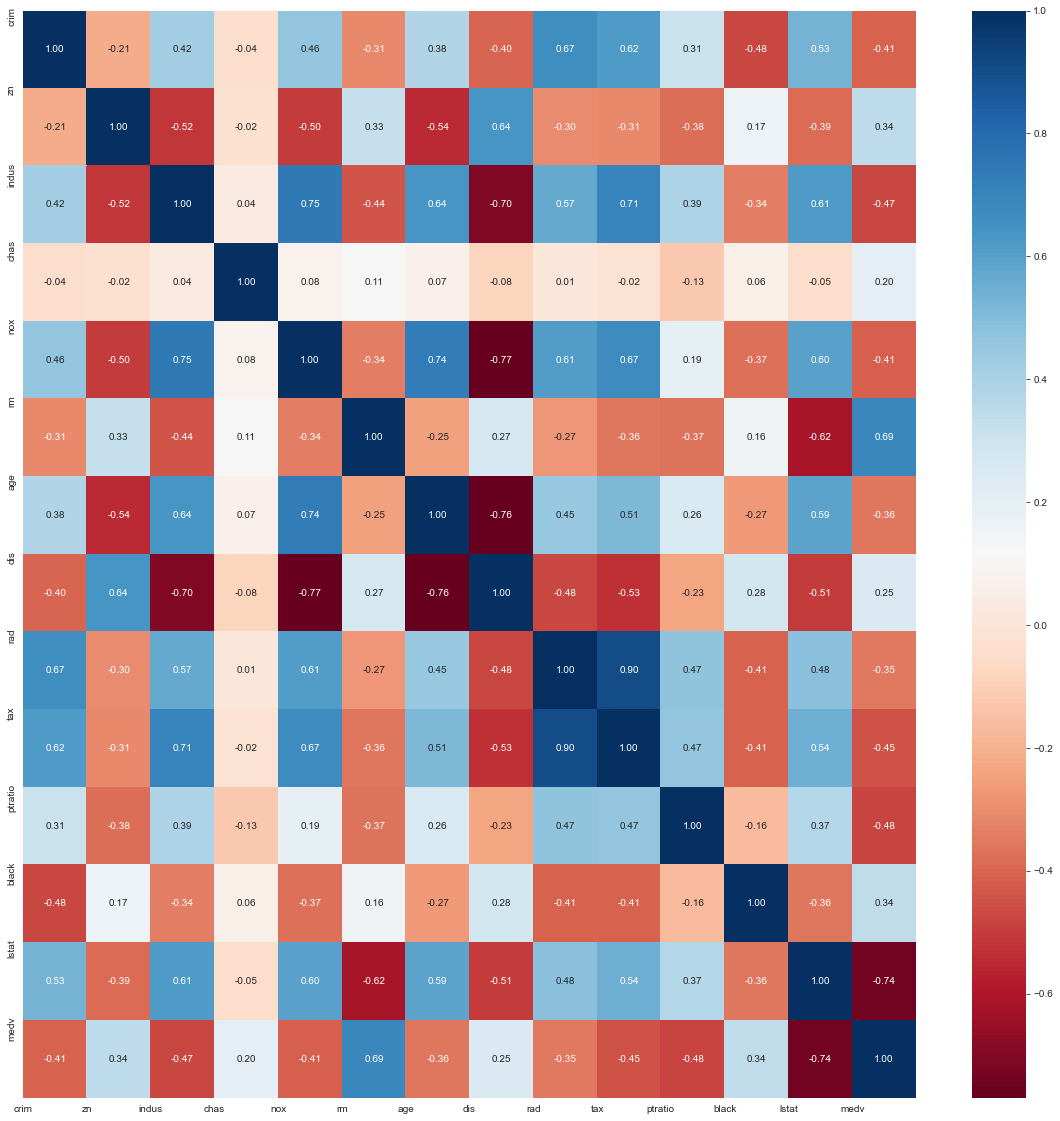

In [26]:
corr = df_train.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(20, 20))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

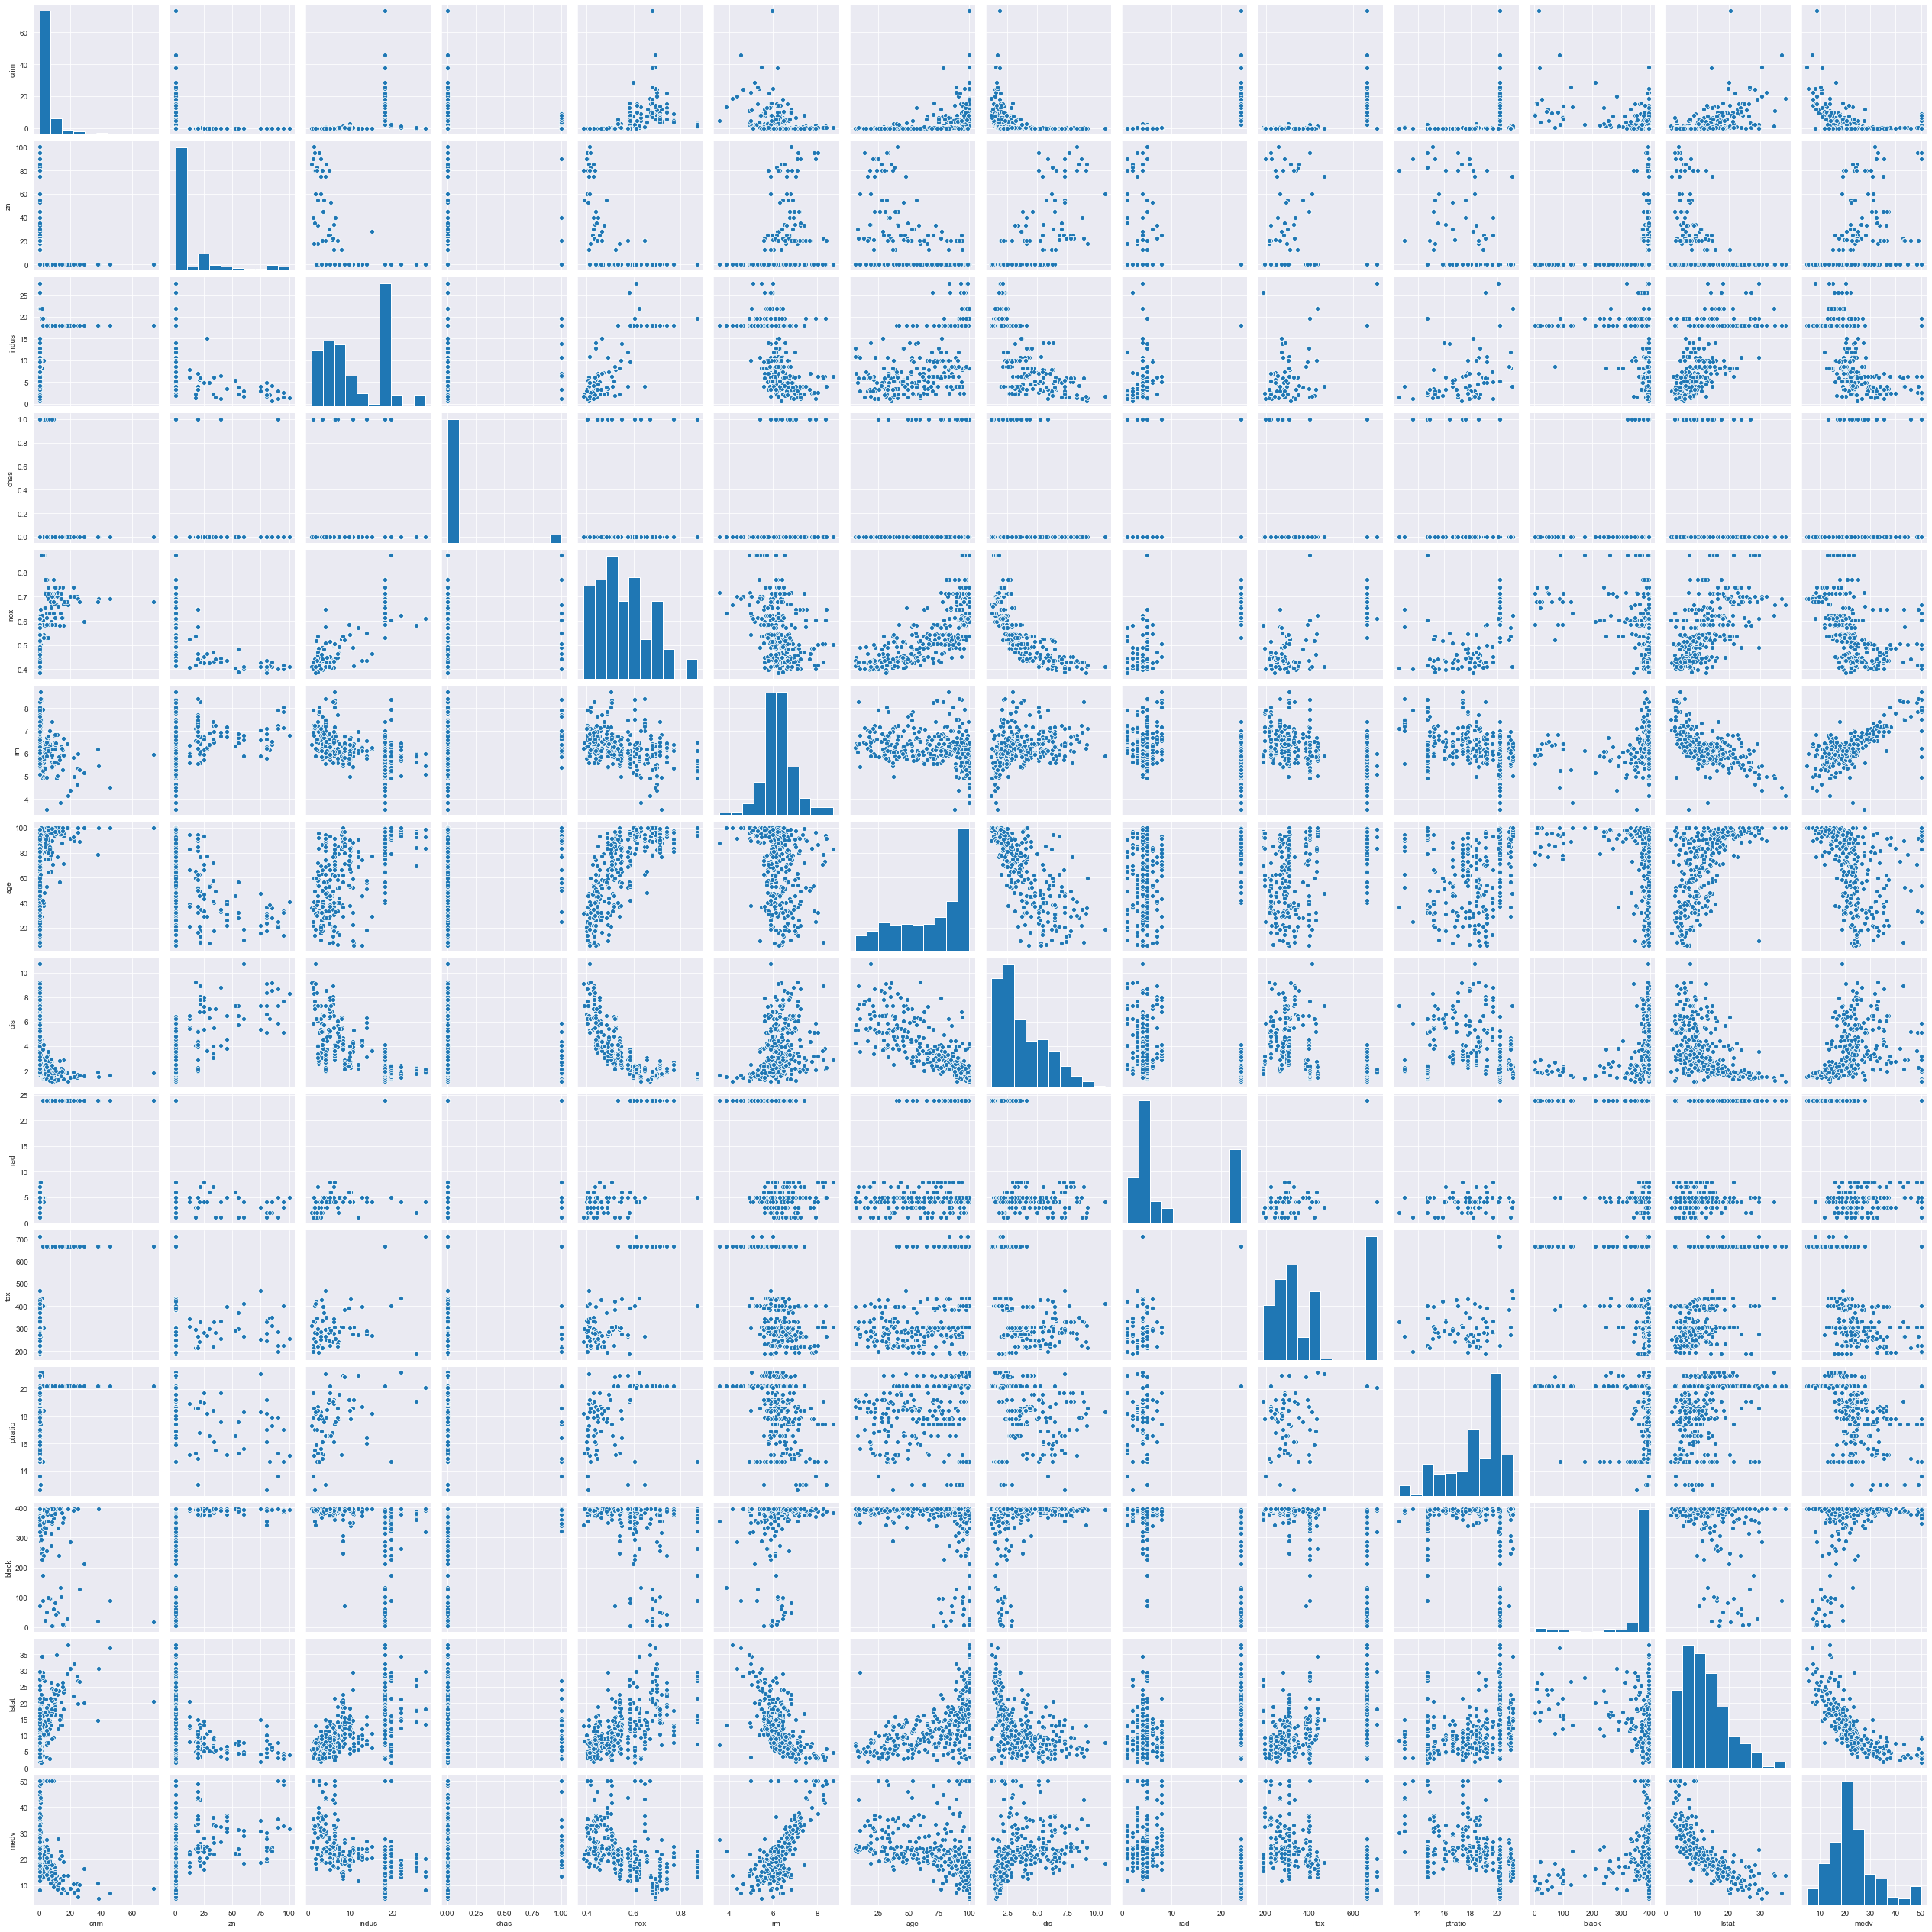

In [7]:
sns.pairplot(df_train)
plt.show()

In [39]:

rows = [[df_train.iloc[:, 12].values[i], df_train.iloc[:, 13].values[i]] 
        for i in range(len(df_train.iloc[:, 12]))]
modified_df = pd.DataFrame(rows, columns = ["lstat", "medv"])

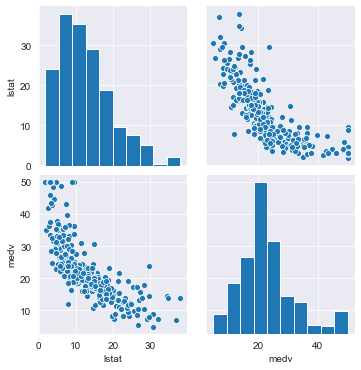

In [40]:
sns.pairplot(modified_df)
plt.show()


In [43]:
modified_df['Log'] = np.log(modified_df['lstat'])

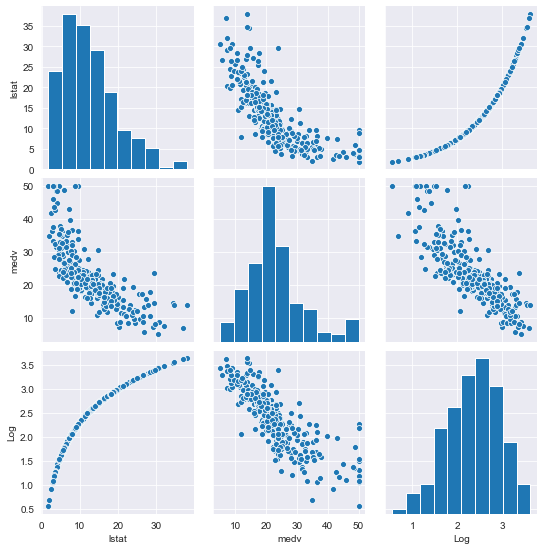

In [44]:
sns.pairplot(modified_df)
plt.show()

In [10]:
X = modified_df.iloc[:, 0].values.reshape(-1,1)
y = modified_df.iloc[:, 1].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [12]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

In [14]:
# Predicting Cross Validation Score the Test set 
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score on the Train set 
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score on the Test set 
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the on Test set 
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.4996059164652397
R2_score (train):  0.5645814379209007
R2_score (test):  0.4907258446414884
RMSE:  7.370098493435469


In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [28]:
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score on the Train set 
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score  on the Test set 
y_pred_poly2_test = regressor_poly2.predict(poly_reg.transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set 
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.4996059164652397
R2_score (train):  0.6633211261483158
R2_score (test):  0.5840785983073555
RMSE:  6.660442865799098


In [29]:
Log_X = np.log(X)
LogX_train, LogX_test, y_train, y_test = train_test_split(Log_X, y, test_size = 0.3, random_state = 25)

In [30]:
regressor_linear = LinearRegression()
regressor_linear.fit(LogX_train, y_train)

LinearRegression()

In [31]:
y_pred_linear_train = regressor_linear.predict(LogX_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)
y_pred_linear_test = regressor_linear.predict(LogX_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

In [32]:
cv_linear = cross_val_score(estimator = regressor_linear, X = LogX_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(LogX_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(LogX_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.6314024295857724
R2_score (train):  0.6891867245582175
R2_score (test):  0.5996450110762743
RMSE:  6.534616357547521
